In [102]:
#
# MultiLayerPerceptron Image classifier
#
# @author becxer
# @email becxer87@gmail.com
# @reference https://github.com/sjchoi86/Tensorflow-101
#

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline  

print ("packages are loaded")

packages are loaded


In [103]:
# Load npz data
npz_path = "images/MYIMG/my_img.npz"

load_data = np.load(npz_path)
print ("Load data : " + str(load_data.files))

train_img = load_data['train_img']
train_label = load_data['train_label']
valid_img = load_data['valid_img']
valid_label = load_data['valid_label']
test_img = load_data['test_img']
test_label = load_data['test_label']

print ("train_img shape : "  + str(train_img.shape))
print ("valid_img shape : "  + str(valid_img.shape))
print ("test_img shape : "  + str(test_img.shape))

Load data : ['valid_img', 'train_img', 'test_img', 'train_label', 'test_label', 'valid_label']
train_img shape : (876, 4096)
valid_img shape : (109, 4096)
test_img shape : (111, 4096)


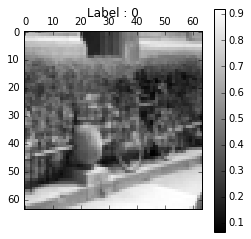

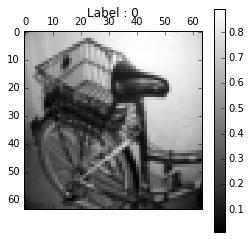

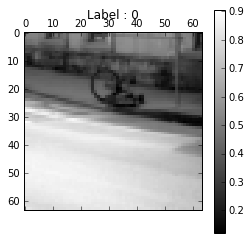

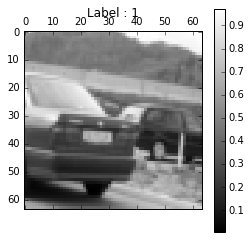

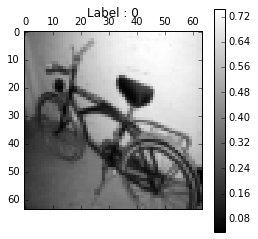

In [104]:
# Plot image
rand_idx = np.arange(train_img.shape[0])
np.random.shuffle(rand_idx)
rand_idx =  rand_idx[:5]

for idx in rand_idx:
    label = np.argmax(train_label[idx])
    img = np.reshape(train_img[idx], (64,64))
    plt.matshow(img,cmap=plt.get_cmap('gray'))
    plt.colorbar()
    plt.title("Label : " + str(label))
    plt.show()

In [159]:
# Options for training
learning_rate = 0.001
training_epochs = 500
batch_size = 100
display_step = 100

# Options for Hidden Network Nodes
n_hidden = [1000, 500, 200] # hidden layer's node count
w_dev = 0.1

# Options for dropout
drop_out_ratio = 1.0

In [160]:
# Build Graph of Dropout MLP

# Define placeholder & Variables
x = tf.placeholder("float", [None, train_img.shape[1]])
y = tf.placeholder("float", [None, train_label.shape[1]])
drop_out_prob = tf.placeholder("float")

def one_layer(_x, _W, _b, _dop):
    return tf.nn.dropout(tf.nn.sigmoid(tf.add(tf.matmul(_x, _W),_b)),_dop)

WS = {}
BS = {}

last_input_layer = x
last_input_layer_size = train_img.shape[1]
for idx, hl_size in enumerate(n_hidden):
    _W = tf.Variable(tf.random_normal([last_input_layer_size, hl_size], stddev=w_dev))
    _b = tf.Variable(tf.random_normal([hl_size])) 
    last_input_layer = one_layer(last_input_layer, _W, _b, drop_out_prob)
    last_input_layer_size = hl_size
    WS['h_' + str(idx)] = _W
    BS['b_' + str(idx)] = _b

WS['out'] = tf.Variable(tf.random_normal([last_input_layer_size, train_label.shape[1]], stddev=w_dev))
BS['out'] = tf.Variable(tf.random_normal([train_label.shape[1]], stddev=w_dev))


# Define operators

out = tf.add(tf.matmul(last_input_layer, WS['out']),BS['out'])

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(out, y))
optm = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

pred = tf.argmax(out, 1)
accr = tf.reduce_mean(tf.cast(tf.equal(pred, tf.argmax(y, 1)),"float"))

init = tf.initialize_all_variables()
print ("Graph build")

Graph build


In [161]:
# Training Graph
sess = tf.Session()
sess.run(init)

for epoch in range(training_epochs):
    avg_cost = 0.
    num_batch = int(train_img.shape[0]/batch_size)
    for i in range(num_batch):
        randidx = np.random.randint(train_img.shape[0], size=batch_size)
        batch_xs = train_img[randidx, :]
        batch_ys = train_label[randidx, :]                
            
        sess.run(optm, feed_dict={x: batch_xs, y: batch_ys, drop_out_prob : drop_out_ratio})
        avg_cost += sess.run(cost, feed_dict={x: batch_xs, y: batch_ys, drop_out_prob : 1.})/num_batch
            
    if epoch % display_step == 0:
        train_img_acc = sess.run(accr , ({x: batch_xs, y: batch_ys, drop_out_prob : 1.}))
        print ("epoch: %03d/%03d  ,  cost: %.6f  ,  train_img_acc: %.3f" \
               % (epoch, training_epochs, avg_cost, train_img_acc))

test_batch_size = 10
avg_acc = 0.
num_batch_test = int(test_img.shape[0]/test_batch_size)
for i in range(num_batch_test):
    batch_xs_test = test_img[i * test_batch_size : (i+1) * test_batch_size ]
    batch_ys_test = test_label[i * test_batch_size : (i+1) * test_batch_size ]            
    avg_acc += sess.run(accr, feed_dict={x : batch_xs_test, y : batch_ys_test, drop_out_prob : 1.})
    
print ("Training complete, Accuracy : %.6f" \
       % (avg_acc / num_batch_test,))


epoch: 000/500  ,  cost: 1.139142  ,  train_img_acc: 0.270
epoch: 100/500  ,  cost: 0.006710  ,  train_img_acc: 1.000
epoch: 200/500  ,  cost: 0.000398  ,  train_img_acc: 1.000
epoch: 300/500  ,  cost: 0.000106  ,  train_img_acc: 1.000
epoch: 400/500  ,  cost: 0.000050  ,  train_img_acc: 1.000
Training complete, Accuracy : 0.645455
